# Notas do curso Séries Temporais com Python

## Capítulo 1: Introdução

### 1. Definição

Séries temporais são dados coletados em intervalos regulares de tempo. Sendo assim, a ordem em que esses dados são apresentados são fundamentais já que eles são tomados em uma sequência temporal histórica particular. Ou seja, ao alterar-se a ordem dos dados, temos uma sequência completamente diferente e que pode levar à análises completamente diferentes.

#### Exemplos conceituais:
Uma base de cadastro de clientes, por exemplo, ou uma base de crédito utilizada por bancos não são séries temporais.

Número de evasão de alunos por mês ou quantidade de internações por dia em um hospital e ainda índice pluviométrico por mês são bons exemplos de séries temporais.

#### Características de séries temporais:
Medida: uma mesma quantidade é medida a intervalos regulares, por exemplo, a quantidade de alunos no primeiro exemplo acima.
Fato: tais alunos têm em comum o fato de que evadiram da escola
Unidade de tempo: esta medida é tomada a cada mês

#### Ordem:
Estas medidas são tomadas em uma sequência histórica determinada: o primeiro dado é tomado no primeiro mês de aulas e os seguintes serão tomados em intervalos regulares de um mês em relação ao dado anterior. É necessário então que estes dados sejam apresentados na ordem correta no momento da análise. Não podemos esperar uma análise correta ao, por exemplo, considerar que os dados do terceiro e quarto meses estejam antes do primeiro e segundo meses.

#### Motivação:
Compreender fenômenos e, com isso, prever eventos a fim de melhorar processos.

### 2. Exemplos Práticos

In [3]:
# Importando biblioteca para ler dados
import pandas as pd

# Importando biblioteca para desenhar gráficos
import matplotlib.pyplot as plt

In [4]:
# Milhas aéreas de passageiros dos EUA de 1937 até 1960
airmiles = pd.read_csv("../Material/Dados/airmiles.csv")

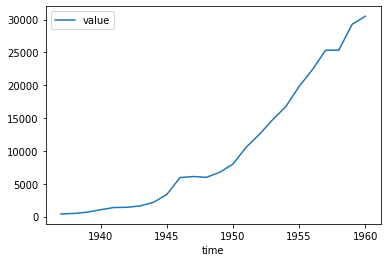

In [5]:
# Removendo coluna de ordenamento
data = airmiles.drop("Unnamed: 0", axis=1)

# Transformando o dataframe em série temporal
ts = data.set_index('time')

# Desenhando gráficos a partir dos dados lidos
ts.plot()
plt.show()

#### Note como temos um crescimento acentuado na curva, mais forte que um crescimento linear e semelhante a um crescimento exponencial. Esta propriedade é chamada Tendência

In [6]:
# Passageiros de milhas aéreas mensais de 1949 até 1960
passengers = pd.read_csv("../Material/Dados/AirPassengers.csv")

In [7]:
# Esta é uma série temporal com intervalo regular de um mês
ts = passengers.set_index("Month")

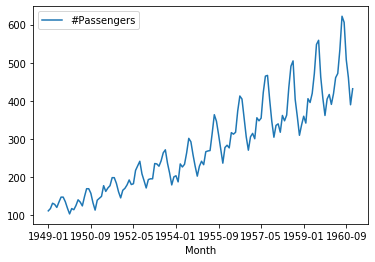

In [8]:
# O gráfico desta série apresenta uma outra propriedade interessante
ts.plot()
plt.show()

#### Repare como, além da tendência marcada pelo crescimento da medida (número de passageiros) ao longo prazo (por exemplo, considerando o intervalo de um ano), observamos a ocorrência de um "movimento pendular" em que a medida cresce e decresce dentro de intervalos regulares. Isto ocorre principalmente pois o número de passageiros aumenta consideravelmente em períodos de férias, como nos períodos do meio e no final de cada ano. Esta propriedade é chamada Sazonalidade.

#### Uma questão interessante a se colocar aqui é: por quê observamos esta sazonalidade no número de passageiros mas não na quantidade milhas aéreas?

Isso ocorre pois as milhas dependem apenas da quantidade de aviões/vôos enquanto o número de passageiros pode variar drasticamente mesmo que o número de vôos permaneça constante.

In [9]:
# Dados trimestrais de residentes australianos (de 1971 a 1994)
austres = pd.read_csv("../Material/Dados/austres.csv")

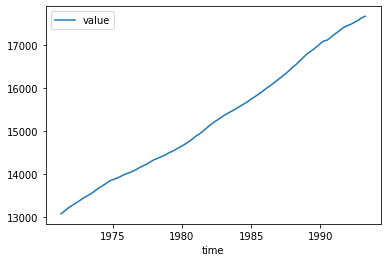

In [10]:
# Removendo coluna de ordenamento
data = austres.drop("Unnamed: 0", axis=1)

# Transformando o dataframe em série temporal
ts = data.set_index('time')

# Desenhando gráficos a partir dos dados lidos
ts.plot()
plt.show()

#### Note que aqui a trendência é mais próxima a uma tendência linear

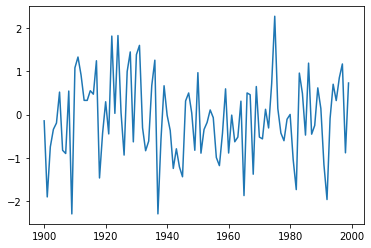

In [34]:
# Dados aleatórios

# Importando biblioteca para análise numérica
import numpy as np

# Criando sequência de números aleatórios entre 1900 e 2000
periods = 100
data = np.random.randn(periods)
ts = pd.Series(data, range(1900, 2000))

# Desenhando gráficos a partir dos dados gerados
ts.plot()
plt.show()

#### Neste caso não é possível determinar nem sazonalidade nem tendência nesta série temporal. Por este motivo, como veremos mais adiante no curso, dificilmente será possível utilizar um algoritmo de aprendizagem de máquina a fim de predizer os valores de futuras medidas.

### 3. Componentes de uma Série Temporal

#### Tendência:
Aumento ou redução a longo prazo. No caso do dataset "austres" temos uma tendência linear de aumento enquanto o dataset "airmiles" tem uma tendência de crescimento exponencial. Os dados aleatórios não apresentam nenhuma tendência.

#### Sazonalidade:
Padrões que ocorrem em intervalos fixos. No dataset "passengers", por exemplo, observamos um mesmo máximo próximo às temporadas de férias.

#### Ciclo:
Aumento ou redução de frequência sem intervalos fixos. Por exemplo, na medida de temperatura podemos ter efeitos climáticos (como o el niño) que aumentam a temepratura de forma significativa sem uma regularidade temporal. Nas bolsas de valores um efeito parecido é observado por influência das crises econômicas.

#### Erro:
Fatores aleatórios que não podem ser explicados matematicamente quando uma decomposição é realizada sobre a série temporal. Também é chamado de diferença ou resto.

Nem toda série temporal tem todas estas componentes.

### 4. Autocorrelação

Medida da correlação entre os intervalos de uma mesma série temporal. Valor entre -1 e 1 (com interpretação análoga a correlação estatística de duas amostras de dados).

Essa medida é feita em lags: um lag de 1 intervalo significa realizar a correlação entre valores de 1 período distantes entre si.

#### Diagramas de autocorrelação: ACF e PACF (partial)

Note: em séries temporais randômicas, geralmente, temos uma baixa autocorrelação. Sendo assim, um bom teste para realizar a fim de testar a aleatoriedade de uma amostra é calcular a autocorrelação, se mais de 5% dos dados de autocorrelação são significativos (isto é, tem AC >= 25%) então provavelmente esta amostra não é aleatória.


### 5. Decomposição

Dado que temos duas ou mais dessas componentes em uma série temporal como podemos decompô-la a fim de facilitar a visualização e análise desta série?

#### Modelos de decomposição:

Aditivo: mais adequado para casos em que a componente sazonal ou a tendência não é proporcional ao nível da série.

Multiplicativo: adequado para casos em que a sazonalidade ou tendência é proporcional ao nível da série.

Definimos nível da série como o valor da média móvel da série temporal.

Por exemplo, na amostra Passengers é possível observar que a sazonalidade aumenta (máximos e mínimos são mais pronunciados) quanto mais recente for a medida. Enquanto a tendência parece se manter constante (linear) ao longo de toda série histórica.